In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pwd
%cd ./drive/My Drive/Colab Notebooks/UniverseDacon/
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)
sample_submission.describe()

/content
/content/drive/My Drive/Colab Notebooks/UniverseDacon


,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
count,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# TRAIN 데이터의 TYPE을 SAMPLE_SUBMISSION에 대응하는 가변수 형태로 변환시킵니다.
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

밑에 코드는 5000개씩으로 sampling (up & down)

train heatmap

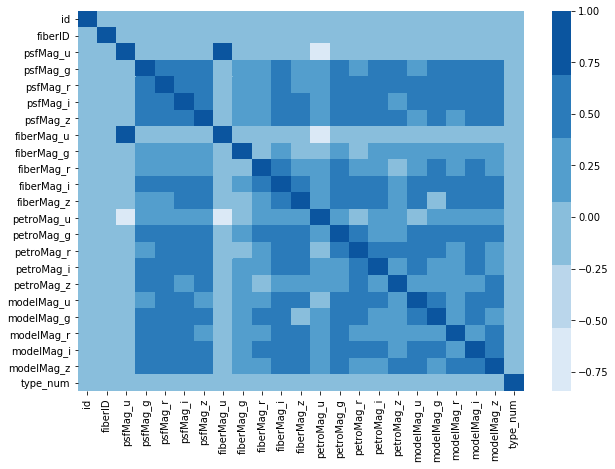

In [0]:
corr = train.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

test heatmap

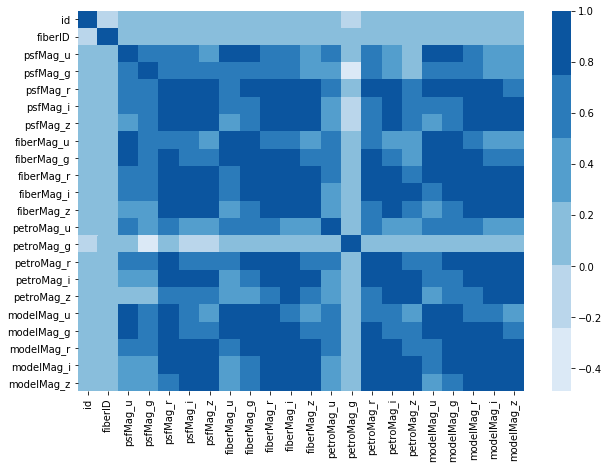

In [0]:
corr = test.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

train 에서 type column 을 없애고 test 랑 합쳐서 .

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199991 entries, 0 to 199990
Data columns (total 24 columns):
id            199991 non-null int64
type          199991 non-null object
fiberID       199991 non-null int64
psfMag_u      199991 non-null float64
psfMag_g      199991 non-null float64
psfMag_r      199991 non-null float64
psfMag_i      199991 non-null float64
psfMag_z      199991 non-null float64
fiberMag_u    199991 non-null float64
fiberMag_g    199991 non-null float64
fiberMag_r    199991 non-null float64
fiberMag_i    199991 non-null float64
fiberMag_z    199991 non-null float64
petroMag_u    199991 non-null float64
petroMag_g    199991 non-null float64
petroMag_r    199991 non-null float64
petroMag_i    199991 non-null float64
petroMag_z    199991 non-null float64
modelMag_u    199991 non-null float64
modelMag_g    199991 non-null float64
modelMag_r    199991 non-null float64
modelMag_i    199991 non-null float64
modelMag_z    199991 non-null float64
type_num      199991

In [0]:
y_train = train['type_num']
train_wo_type = train.drop(columns=['id','type','type_num','fiberID'], axis=1)
test = test.drop(columns=['fiberID','id'])
total = pd.concat([train_wo_type, test])
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210000 entries, 0 to 10008
Data columns (total 20 columns):
psfMag_u      210000 non-null float64
psfMag_g      210000 non-null float64
psfMag_r      210000 non-null float64
psfMag_i      210000 non-null float64
psfMag_z      210000 non-null float64
fiberMag_u    210000 non-null float64
fiberMag_g    210000 non-null float64
fiberMag_r    210000 non-null float64
fiberMag_i    210000 non-null float64
fiberMag_z    210000 non-null float64
petroMag_u    210000 non-null float64
petroMag_g    210000 non-null float64
petroMag_r    210000 non-null float64
petroMag_i    210000 non-null float64
petroMag_z    210000 non-null float64
modelMag_u    210000 non-null float64
modelMag_g    210000 non-null float64
modelMag_r    210000 non-null float64
modelMag_i    210000 non-null float64
modelMag_z    210000 non-null float64
dtypes: float64(20)
memory usage: 33.6 MB


Train + Test Heatmap

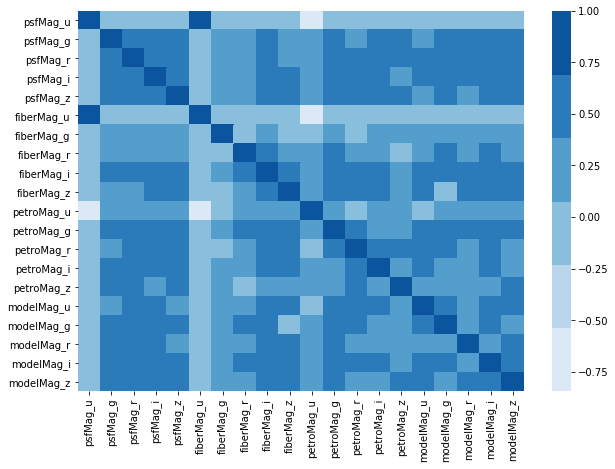

In [0]:
corr = total.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [0]:
y_train.describe()
X_train = train.drop(columns=['id','type','type_num','fiberID'], axis=1)

In [0]:
pd.DataFrame(X_train).describe()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,18.000882,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,145.862346,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,-26505.602101,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,17.606148,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,18.710967,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,20.133179,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,18358.921741,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


In [0]:
total = pd.concat([train_wo_type, test])

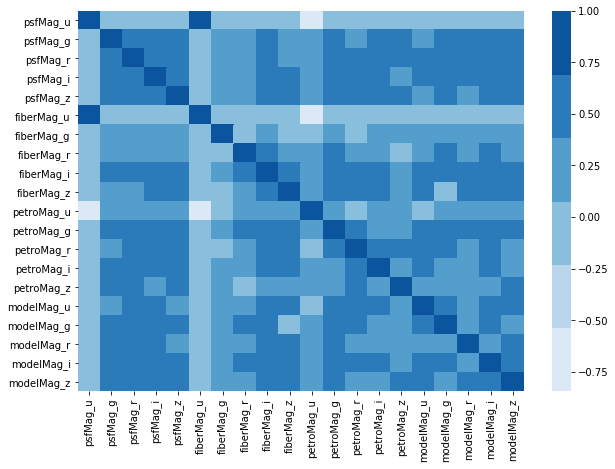

In [0]:
corr = total.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [0]:
y_train = train['type_num']
X_train = train.drop(columns=['id','type','type_num','fiberID'], axis=1)
test

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,23.817399,22.508963,20.981106,18.517316,17.076079,25.053890,23.167848,21.335901,18.835858,17.434384,22.246697,22.796239,21.195315,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474
1,22.806983,21.937111,20.335770,20.000512,19.527369,22.498565,22.186000,20.618879,20.301204,20.030078,21.729831,21.837511,20.196128,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372
2,21.024250,19.235669,18.304061,17.808608,17.380113,21.205546,19.439533,18.344433,17.909690,17.538164,20.722629,18.710223,17.611851,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748
3,20.503424,20.286261,20.197204,20.162419,20.059832,20.976132,20.611498,20.567262,20.479318,20.277472,20.329269,20.385262,20.129157,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909
4,24.244851,22.668237,21.239333,19.284777,18.235939,25.681860,22.935289,21.642456,19.624926,18.591749,22.308298,22.957496,21.285033,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,19.765035,19.542406,19.439286,19.357957,19.357305,20.093308,19.827172,19.714033,19.686861,19.809697,19.882728,19.549257,19.457564,19.303361,19.483389,19.792181,19.536518,19.432463,19.376445,19.354976
10005,19.960030,19.609379,19.325949,19.391290,19.258862,20.319914,19.928523,19.696262,19.763771,19.407112,20.085454,19.635609,19.381924,19.460517,19.390865,20.066552,19.604800,19.334113,19.401240,19.159412
10006,21.221899,20.276182,20.090775,19.927208,19.766732,21.254454,20.551190,20.365800,20.200872,19.930425,20.998020,20.315201,20.236725,20.058801,19.988363,21.045501,20.255485,20.141549,19.906014,19.953932
10007,21.625469,21.624585,21.093379,21.191775,21.186596,22.042942,21.950139,21.610805,21.501469,21.641811,22.320173,21.516809,21.270925,21.196019,21.331529,21.700769,21.589489,21.128330,21.430526,21.220902


8     49680
6     37347
18    21760
15    14630
4     14618
10    13750
5     13500
13     7132
11     6580
1      6506
7      4654
14     3257
3      2562
0      2160
16     1154
2       500
9       127
17       61
12       13
Name: type_num, dtype: int64


Text(0.5, 1.0, 'type Values in the Training Set - train()')

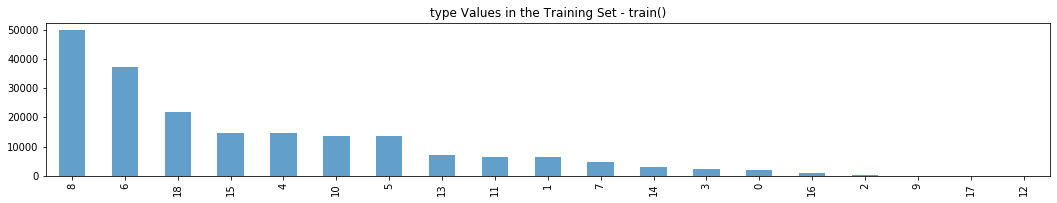

In [0]:
%matplotlib inline

print(y_train.value_counts())
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=0.1)

plt.subplot2grid((3,3), (0,0), colspan=3)
y_train.value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train()')

In [0]:
test.describe()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,20.987400,19.878440,19.280218,18.873165,18.618385,21.184506,20.091376,19.497732,19.083329,18.826624,20.715429,19.462021,18.995001,18.616519,18.411996,20.739001,19.534844,18.935095,18.522308,18.281069
std,2.111703,2.573890,1.709344,1.720713,1.702236,1.990940,1.865064,1.710070,1.633953,1.711790,2.807434,13.971203,1.979225,1.970463,2.373022,2.187025,1.957506,1.856617,1.796820,1.867582
min,-7.248195,-42.663871,9.134712,-22.522266,13.349827,9.390439,8.188752,12.288183,12.688984,-8.455932,-98.181975,-1348.068776,-23.908952,-8.356654,-64.917293,12.419765,13.617577,13.382832,12.955113,12.395695
25%,19.655525,18.671025,18.037847,17.742016,17.424701,19.940430,18.892043,18.253627,17.905253,17.610776,19.249432,18.104265,17.475078,17.043615,16.805557,19.268471,18.064625,17.424393,16.971911,16.715685
50%,20.854404,19.910333,19.444925,19.033283,18.594713,21.040735,20.071658,19.627904,19.180605,18.699819,20.371014,19.582955,19.197068,18.684269,18.171966,20.412702,19.541261,19.155839,18.635195,18.095883
75%,22.160801,21.150040,20.489912,20.083814,19.878652,22.339213,21.402558,20.756306,20.331848,20.119736,21.803705,21.025719,20.428279,20.015701,19.815916,21.992969,20.981396,20.389215,19.970657,19.823902
max,37.681143,182.654452,31.883768,47.227391,34.946057,41.169991,47.160580,29.266687,31.146742,26.478564,65.392087,106.962571,41.850633,52.221528,74.747394,32.641240,28.814977,27.579664,26.471555,24.461973


이번 모델에선 더 많은 train 을 훈련하기 위하여 eval set 없이 진행

In [0]:
# col_list = X_train.columns
# k=5
# for idx,col in enumerate (col_list):
#   for j in range(k):
#     X_train['%s_%s*%s'%(col[:3],
#                       col[-1],
#                       col_list[idx+j][-1])] = train[col] * train[col_list[idx+j]]
#     test['%s_%s*%s'%(col[:3],
#                      col[-1],
#                      col_list[idx+j][-1])] = test[col] * test[col_list[idx+j]]
#   k-=1
#   if k==0:
#     k=5

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, \
                                                  test_size=0.2, random_state=0)

Class Unbalanced 일때, weight 부여.

In [0]:
# from sklearn.utils import class_weight
# class_weights = list(class_weight.compute_class_weight('balanced',
#                                              np.unique(train['type_num']),
#                                              train['type_num']))

# w_array = np.ones(y_train.shape[0], dtype = 'float')
# for i, val in enumerate(y_train):
#     w_array[i] = class_weights[val-1]

LDA 안한 것으로 돌려야 더 성능이 좋음.

가중치 주어도 성능이 떨어짐.

### Parameter & Results Deriv feat 했을때.
1.  10, 1500 20, 2000 --> 0.395
2.  12 1500 22 2200 --> 0.387(0.37436633510448225)
3.  15 1500 25 2000 -->0.384(0.3727928272654572)
4. 


###Deriv feat 안했을때
1. 10, 1500 20, 2000 --> 0.395
2. 10, 1300, 20, 1000 --> 0.3740680522180537(valid)

In [0]:
%%time
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
# 10, 1500 20, 2000 --> 0.395
# 10, 1300, 20, 1000 --> 0.3740680522180537(valid)
XGB_clf = XGBClassifier(max_depth = 12,n_esetimators=1300, n_jobs=-1, random_state=0)
XGB_clf.get_params()

rf_clf = RandomForestClassifier(max_depth=20, n_estimators=2000,max_features=7, oob_score=False, n_jobs=-1)

CPU times: user 364 µs, sys: 0 ns, total: 364 µs
Wall time: 391 µs


In [0]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(boosting_type='gbdt', num_leaves=250, max_depth=-1, learning_rate=0.005, min_data_in_leaf = 5,
                             n_estimators=10000, subsample_for_bin=250000, objective='multiclass', min_split_gain=0.34, reg_alpha = 0.01, reg_lambda = 0.01,
                             min_child_weight=0.005, min_child_samples=17,n_jobs=-1, random_state=123)


In [0]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('XGB', XGB_clf), ('lgbm', lgbm_wrapper)],
    voting='soft')

voting_clf.fit(X_train, y_train)

exception calling callback for <Future at 0x7f6299fd1c18 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/local/lib/python3.6/dist-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))
  File "/usr/local/lib/

TerminatedWorkerError: ignored

In [0]:
yk_grd_probs = voting_clf.predict_proba(X_valid)
print(log_loss(y_valid, yk_grd_probs))

0.3740680522180537


In [0]:
voting_pred = voting_clf.predict_proba(test)
submission = pd.DataFrame(data=voting_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('voting.csv', index=True)
submission.describe()

,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,0.010447,0.032424,0.002524,0.012482,0.075183,0.067607,0.187047,0.021516,0.248048,0.000616,0.069158,0.029841,0.000115,0.034865,0.016712,0.073909,0.005634,0.000302,0.111569
std,0.063912,0.171152,0.033678,0.096645,0.249261,0.223604,0.379648,0.094440,0.383054,0.020777,0.248013,0.089009,0.000552,0.134552,0.115787,0.252777,0.068116,0.001908,0.258204
min,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000006,0.000004,0.000031,0.000003,0.000003,0.000035,0.000003,0.000004,0.000003,0.000003,0.000003,0.000003,0.000004
25%,0.000013,0.000009,0.000008,0.000010,0.000009,0.000012,0.000066,0.000034,0.000865,0.000008,0.000028,0.000729,0.000008,0.000062,0.000013,0.000008,0.000009,0.000011,0.000029
50%,0.000097,0.000054,0.000035,0.000047,0.000048,0.000093,0.000249,0.000179,0.009501,0.000031,0.000056,0.004412,0.000034,0.000151,0.000051,0.000046,0.000041,0.000043,0.000300
75%,0.000774,0.000234,0.000099,0.000130,0.000164,0.003128,0.005906,0.001443,0.378315,0.000087,0.000140,0.018895,0.000101,0.008316,0.000123,0.000138,0.000106,0.000135,0.010302
max,0.926796,0.995118,0.917693,0.993405,0.981934,0.991776,0.999798,0.955001,0.999437,0.979736,0.999152,0.910893,0.027299,0.987214,0.993177,0.996525,0.997109,0.070903,0.999559
